In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC


C:\Users\omkar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
def data_info(df):
    print('Nunber of rows :',df.shape[0]) # Total counts of Movies & TV-show
    print('Nunber of columns : ',df.shape[1])    # gives Total count of column
    print('-'*70)
    print('dataset columns :\n') # All column_Name
    print(df.columns)
    print('-'*70)
    print('data-type of each column: \n') # 
    print(df.dtypes)
    print('-'*70)
    print('Missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_info(df)

Nunber of rows : 5000
Nunber of columns :  14
----------------------------------------------------------------------
dataset columns :

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
----------------------------------------------------------------------
data-type of each column: 

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object
----------------------------------------------------------------------
Missing rows in each column: 

Series([], dtyp

In [4]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
# In Describe Function shows that Minimum Experience is -3 which is invalid

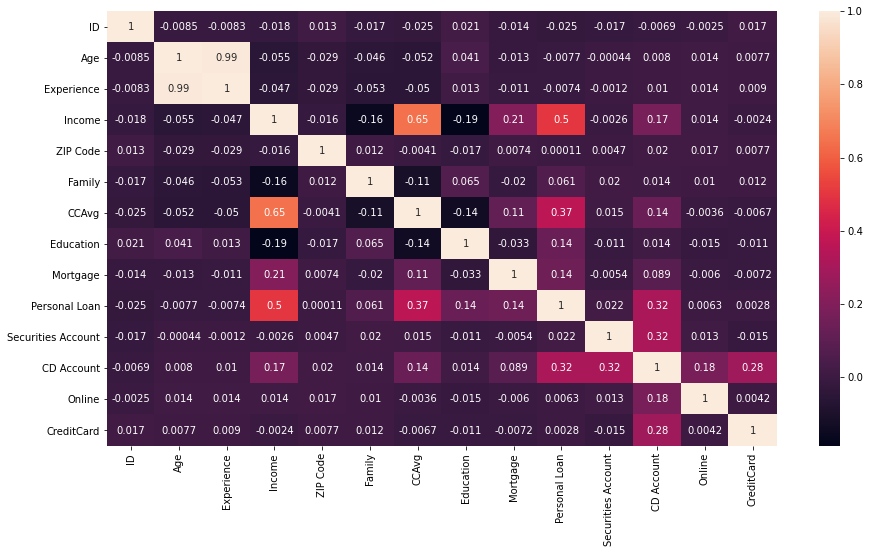

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:
col = ["Age","Experience","Income","Family","CCAvg","Education","Mortgage","Personal Loan"]

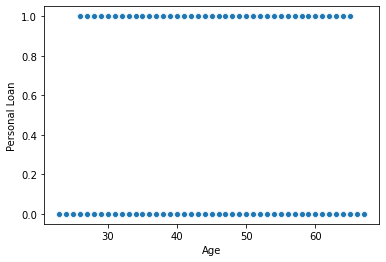

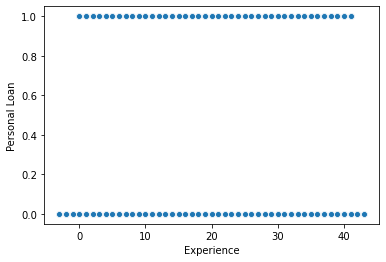

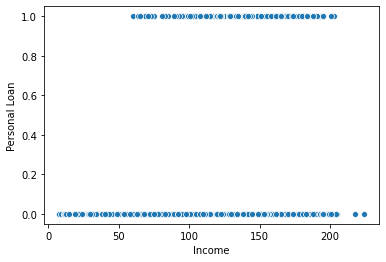

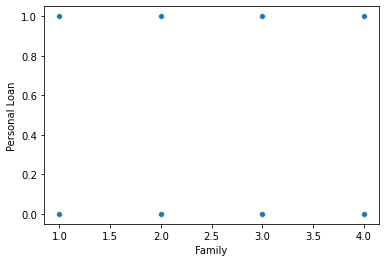

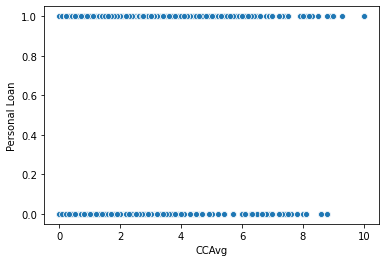

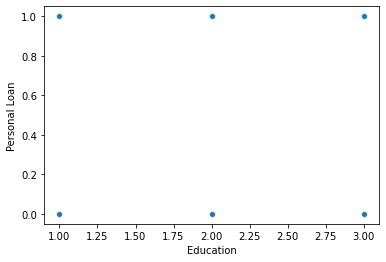

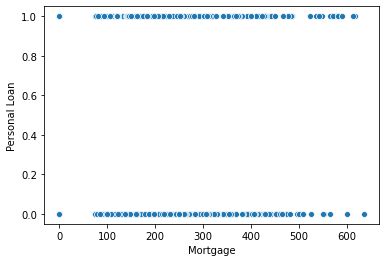

In [8]:
for c in col:
    if c!="Personal Loan":
        plt.figure()
        sns.scatterplot(data=df,y="Personal Loan",x=c)
        plt.show()

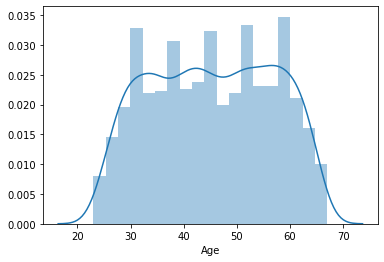

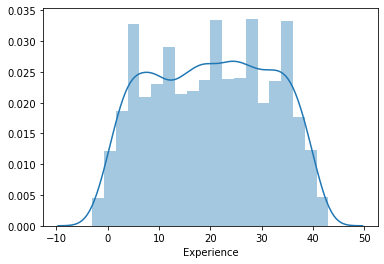

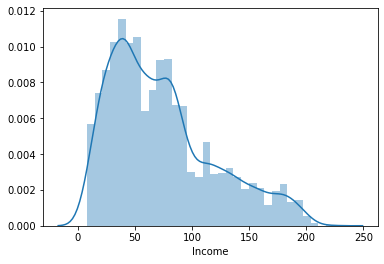

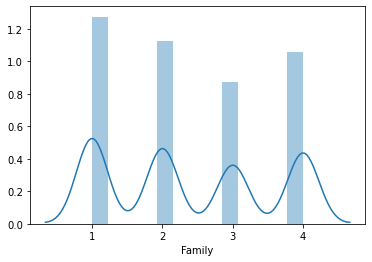

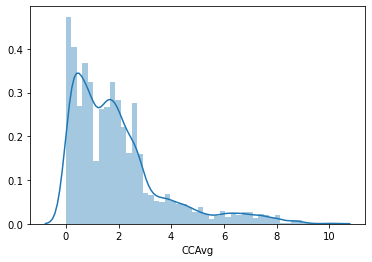

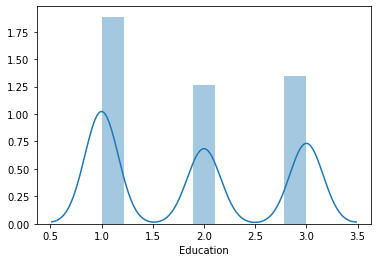

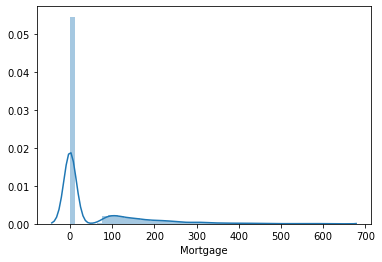

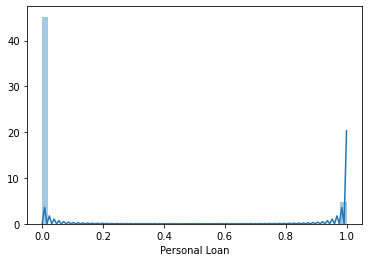

In [9]:
for c in col:
        plt.figure()
        sns.distplot(df[c])
        plt.show() 

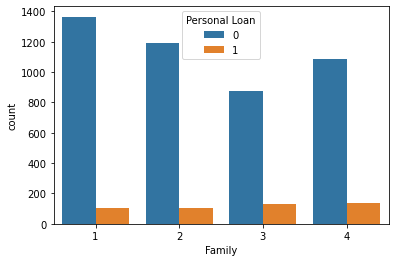

In [10]:
plt.figure()
sns.countplot(data=df,x='Family',hue='Personal Loan')
plt.show()

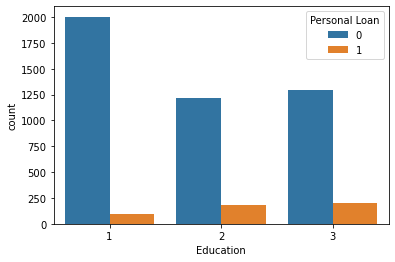

In [11]:
plt.figure()
sns.countplot(data=df,x='Education',hue='Personal Loan')
plt.show()

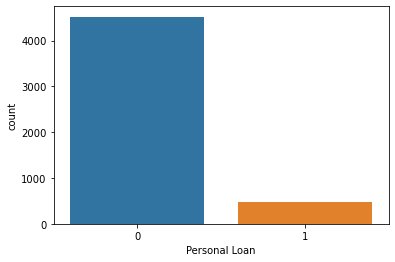

In [12]:
plt.figure()
sns.countplot(data=df,x='Personal Loan')
plt.show()

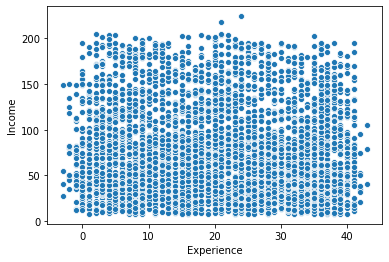

In [13]:
plt.figure()
sns.scatterplot(data=df,x='Experience',y='Income')
plt.show()

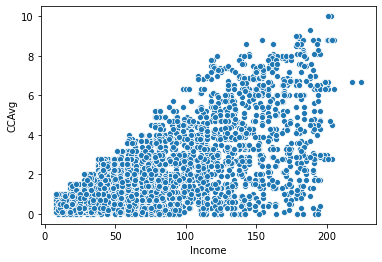

In [14]:
plt.figure()
sns.scatterplot(data=df,x='Income',y='CCAvg')
plt.show()

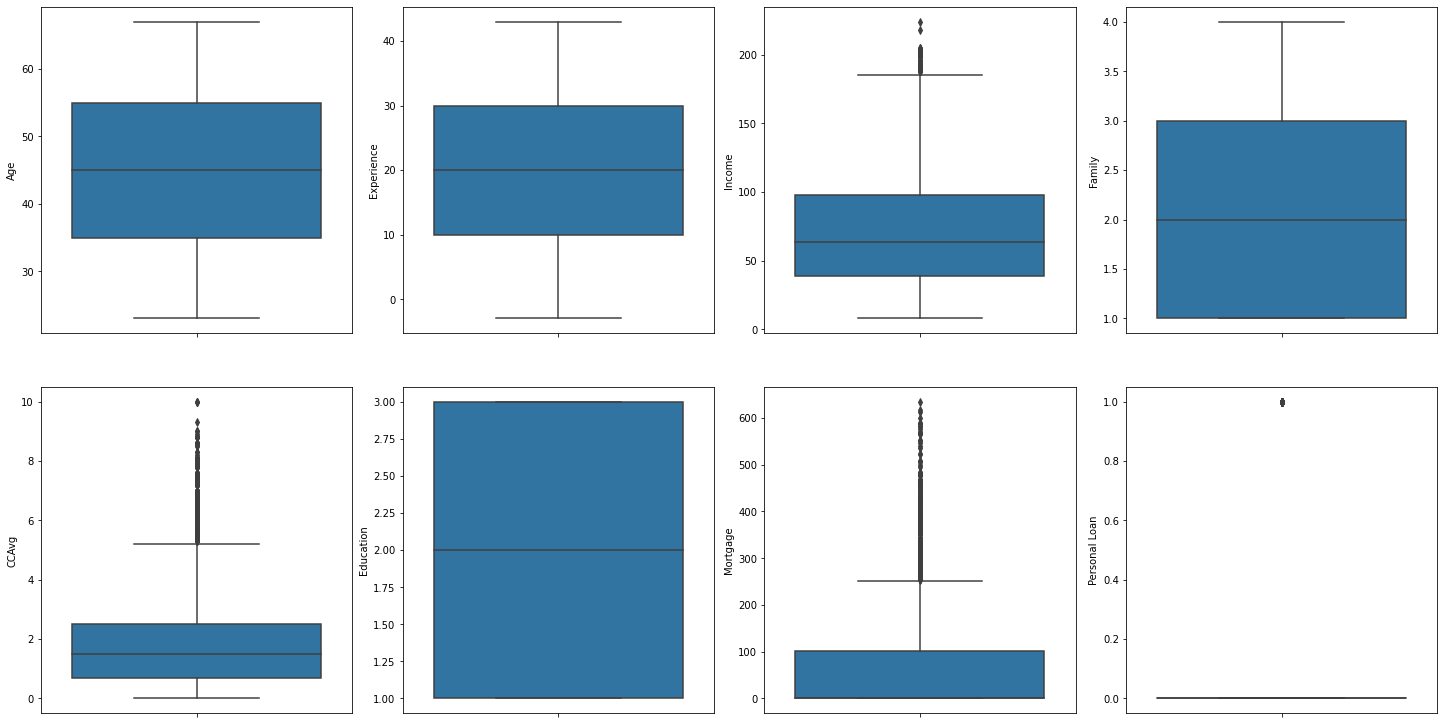

In [15]:
fig,ax = plt.subplots(ncols = 4,nrows =2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col,val in df.items():
    if col!='ID':
        if col!='ZIP Code':
            if col !='Securities Account':
                if col !='CD Account':
                    if col !='Online':
                        if col !='CreditCard':
                            sns.boxplot(y=col,data=df,ax = ax[index])
                            index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0) 

In [16]:
### Checking the Skewness

for col,value in df.items():
    if col!='ID':
        if col!='ZIP Code':
            if col !='Securities Account':
                if col !='CD Account':
                    if col !='Online':
                        if col !='CreditCard':
                            if col != 'Personal Loan':
                                print(col,"Skwemess :",skew(value))

Age Skwemess : -0.029331878574766698
Experience Skwemess : -0.026316790337654442
Income Skwemess : 0.8410861846424931
Family Skwemess : 0.15517409936178264
CCAvg Skwemess : 1.5979637637001873
Education Skwemess : 0.22702518198805896
Mortgage Skwemess : 2.103371065804789


In [17]:
df["Mortgage"] = np.sqrt(df["Mortgage"])
df["CCAvg"] = np.sqrt(df["CCAvg"])

In [18]:
# Spliting DataSet

X= df.drop(columns = ['ID','ZIP Code','Securities Account','CD Account','Online','CreditCard','Personal Loan'])
y = df['Personal Loan']

In [19]:
# Standardizing DataSet

for col in X:
    ss = StandardScaler()
    X[col]=ss.fit_transform(X[[col]])

In [20]:
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage
0,-1.774417,-1.666078,-0.538229,1.397414,0.019088,-1.049078,-0.636539
1,-0.029524,-0.096330,-0.864109,0.525991,-0.047209,-1.049078,-0.636539
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.418164,-1.049078,-0.636539
3,-0.901970,-0.968413,0.569765,-1.216855,0.643423,0.141703,-0.636539
4,-0.901970,-1.055621,-0.625130,1.397414,-0.418164,0.141703,-0.636539


In [21]:
y.value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [23]:
# OverSampling

from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X,y = oversample.fit_resample(X,y)

In [24]:
y.value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

In [25]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", model.score(X_test, y_test) * 100)
    return model

In [26]:
lr = LogisticRegression(random_state = 1)
classify(lr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       900
           1       0.78      0.56      0.65       100

    accuracy                           0.94      1000
   macro avg       0.87      0.77      0.81      1000
weighted avg       0.94      0.94      0.94      1000

[[884  16]
 [ 44  56]]
Accuracy: 94.0


LogisticRegression(random_state=1)

In [27]:
dt1=DecisionTreeClassifier(random_state=1)
classify(dt1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       900
           1       0.94      0.88      0.91       100

    accuracy                           0.98      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.98      0.98      0.98      1000

[[894   6]
 [ 12  88]]
Accuracy: 98.2


DecisionTreeClassifier(random_state=1)

In [28]:
dt2=DecisionTreeClassifier(max_depth=9)
classify(dt2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       900
           1       0.94      0.87      0.90       100

    accuracy                           0.98      1000
   macro avg       0.96      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000

[[894   6]
 [ 13  87]]
Accuracy: 98.1


DecisionTreeClassifier(max_depth=9)